In [121]:
import pandas as pd
import numpy as np 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
pd.options.display.max_columns= 500
pd.options.display.max_rows= 500

In [122]:
%run Final_cleaned_Script.ipynb 

df=pd.DataFrame(list(mycol.find()))

/Users/simrandeepsingh/opt/anaconda3/lib/python3.9/site-packages/pymongo/compression_support.py:59: UserWarning: Unsupported compressor: disabled
  warnings.warn("Unsupported compressor: %s" % (compressor,))
/Users/simrandeepsingh/opt/anaconda3/lib/python3.9/site-packages/pymongo/common.py:797: UserWarning: Unknown option gssapiservicename
  warnings.warn(str(exc))


{'_id': ObjectId('62e0a12d4da9db1f09a268de'),
 'bathrooms': '2.25',
 'bedrooms': '4',
 'condition': '4',
 'floors': '2',
 'lat': '47.4388',
 'long': '-122.162',
 'price': '365',
 'sqft_living': '2070',
 'sqft_lot': '8893',
 'waterfront': '0',
 'yr_built': '1986',
 'yr_renovated': '0',
 'zipcode': 'N8X 2E2'}


In [123]:
df.head()

,_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated,zipcode,lat,long
0,62e0a12d4da9db1f09a268de,365,4,2.25,2070,8893,2,0,4,1986,0,N8X 2E2,47.4388,-122.162
1,62e0a12d4da9db1f09a268df,865,5,3,2900,6730,1,0,5,1977,0,N9C 3C7,47.6784,-122.285
2,62e0a12d4da9db1f09a268e0,1038,4,2.5,3770,10893,2,0,3,1997,0,N9A 3C5,47.5646,-122.129
3,62e0a12d4da9db1f09a268e1,1490,3,3.5,4560,14608,2,0,3,1990,0,N8W 5L9,47.6995,-122.228
4,62e0a12d4da9db1f09a268e2,711,3,2.5,2550,5376,2,0,3,2004,0,N8X 5A7,47.6647,-122.083


In [124]:
df.columns

Index(['_id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long'],
      dtype='object')

In [125]:
y= df['price']
x=df.iloc[:, 2:11]

print('shape of x=',x.shape)
print('shape of y=',y.shape)

shape of x= (138320, 9)
shape of y= (138320,)


In [126]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated
0,4,2.25,2070,8893,2,0,4,1986,0
1,5,3,2900,6730,1,0,5,1977,0
2,4,2.5,3770,10893,2,0,3,1997,0
3,3,3.5,4560,14608,2,0,3,1990,0
4,3,2.5,2550,5376,2,0,3,2004,0


In [127]:
y.head()

0     365
1     865
2    1038
3    1490
4     711
Name: price, dtype: object

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=51)

print('shape of x_train = ', x_train.shape)
print('shape of y_train = ', y_train.shape)
print('shape of x_test = ', x_test.shape)
print('shape of y_test = ', y_test.shape)

shape of x_train =  (110656, 9)
shape of y_train =  (110656,)
shape of x_test =  (27664, 9)
shape of y_test =  (27664,)


In [129]:
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [130]:
x_train

array([[-0.40074569,  0.50113733,  0.37520852, ..., -0.62608425,
         1.23360303, -0.21095742],
       [ 0.67363142, -0.47112321,  0.22310824, ...,  2.44947195,
        -0.06124635, -0.21095742],
       [-0.40074569,  0.50113733, -0.15714247, ...,  0.91169385,
         0.99507814, -0.21095742],
       ...,
       [-0.40074569,  0.50113733, -0.51566457, ...,  0.91169385,
         0.75655326, -0.21095742],
       [-0.40074569,  0.50113733,  0.44039436, ..., -0.62608425,
         0.82470322, -0.21095742],
       [-0.40074569, -1.44338376, -0.96110112, ...,  0.91169385,
        -0.06124635, -0.21095742]])

In [131]:
x_test

array([[ 0.67363142,  0.50113733,  0.54903742, ..., -0.62608425,
         1.13137808, -0.21095742],
       [-1.4751228 , -1.44338376, -1.02628696, ..., -0.62608425,
        -0.9812709 , -0.21095742],
       [ 0.67363142,  0.82522418,  0.22310824, ..., -0.62608425,
         1.09730309, -0.21095742],
       ...,
       [ 1.74800853, -0.79521006,  0.47298728, ...,  0.91169385,
        -1.45832067, -0.21095742],
       [ 0.67363142,  0.17705048,  0.11446518, ..., -0.62608425,
         0.24542851, -0.21095742],
       [ 0.67363142,  0.50113733,  1.05965981, ..., -0.62608425,
         1.13137808, -0.21095742]])

In [132]:
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [133]:
lr.coef_

array([-57.6369146 ,  48.09409561, 271.9900611 , -12.10012312,
        28.71134809,  64.97272851,  12.68582256, -88.02080818,
         2.85895662])

In [134]:
lr.intercept_

541.2860707598321

In [135]:
x_test[0, :]

array([ 0.67363142,  0.50113733,  0.54903742, -0.25860219,  0.94401623,
       -0.08876151, -0.62608425,  1.13137808, -0.21095742])

In [136]:
lr.predict([x_test[0, :]])

array([592.23019761])

In [137]:
lr.predict(x_test)

array([592.23019761, 325.07014434, 521.94683396, ..., 667.70433419,
       535.10249477, 730.43294598])

In [138]:
y_test

31438     700
32051     153
57164     430
49695     483
135454    425
         ... 
76395     385
65259     548
76271     250
110226    320
29957     775
Name: price, Length: 27664, dtype: object

In [139]:
lr.score(x_test, y_test)

0.5901608855183513

In [140]:
pickle.dump(lr, open('predictHousePrice.pkl', 'wb'))

In [141]:
pickle.dump(sc, open('scaler.pkl', 'wb'))

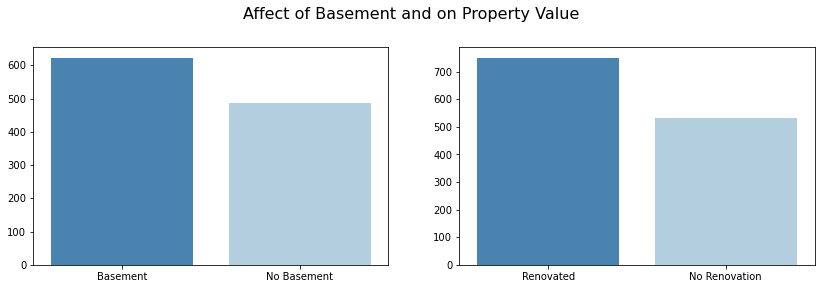

In [142]:
ddf=pd.read_csv("/Users/simrandeepsingh/ADT/Windsor_house_data_train.csv")

#graph for basement availability
basement=ddf[(ddf["sqft_basement"] >0)]
basement_mean= basement.price.mean()
no_basement = ddf[(ddf["sqft_basement"] ==0)]
no_basement_mean= no_basement.price.mean()

#graph values based on Renovation
renovated=ddf[(ddf["yr_renovated"] >0)]
renovated_mean= renovated.price.mean()
no_renovated = ddf[(ddf["yr_renovated"] ==0)]
no_renovated_mean= no_renovated.price.mean()

#putting plot labels
label_basement= ["Basement", "No Basement"]
values_basement= [basement_mean, no_basement_mean]
label_renovation= ["Renovated", "No Renovation"]
values_renovation= [renovated_mean, no_renovated_mean]

fig, ax=plt.subplots(1,2, figsize=(14,4))
sns.barplot(ax=ax[0], x=label_basement, y=values_basement, palette="Blues_r")
sns.barplot(ax=ax[1], x=label_renovation, y=values_renovation, palette="Blues_r")
plt.suptitle("Affect of Basement and on Property Value", size=16, y=1.02)
plt.show();


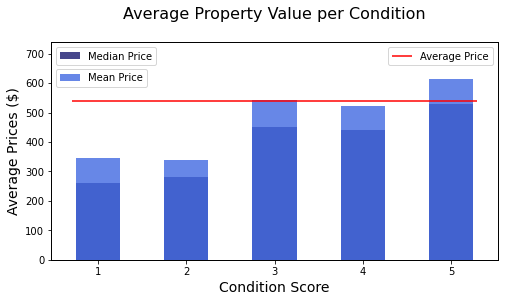

In [143]:
# conditon calculation
condition_mean= ddf.groupby("condition")["price"].mean()
condition_median= ddf.groupby("condition")["price"].median()
condition_score= np.arange(1,6)
meanPrice= ddf.price.mean()

# set subplot data
fig, ax=plt.subplots(figsize=(8,4))
ax2= ax.twinx()
ax3= ax.twinx()
width= 0.5

#bar plots
ax.bar(x= condition_score, height=condition_median, width=width, label= "Median Price",
             color="midnightblue", alpha=0.8)
ax2.bar(x= condition_score, height=condition_mean, width=width, label= "Mean Price", 
             color="royalblue", alpha=0.8)

#horizontal line for mean price
ax3.hlines(meanPrice, .7, 5.3, colors="red", label="Average Price")

#set ylimit to the same scale and display only 1
ax.set_ylim(0,1.2*condition_mean.max())
ax2.set_ylim(0,1.2*condition_mean.max())
ax3.set_ylim(0,1.2*condition_mean.max())
ax2.yaxis.set_visible(False) #hide the 2nd axis
ax3.yaxis.set_visible(False)

#set legend positions
ax.legend(bbox_to_anchor=(0,0,1,1), loc="upper left")
ax2.legend(bbox_to_anchor=(0,-.1,1,1), loc="upper left")
ax3.legend(bbox_to_anchor=(0,0,1,1), loc="upper right")

#prettify graph
ax.set_ylabel("Average Prices ($)", size=14)
ax.set_xlabel("Condition Score", size=14)
plt.title("Average Property Value per Condition", size=16, y=1.08)

#uncomment line below to export image
# plt.savefig("images/condition_value.png",bbox_inches = "tight")
plt.legend()
plt.show();

In [144]:
df.describe()

,_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated,zipcode,lat,long
count,138320,138320,138320,138320,138320,138320,138320,138320,138320,138320,138320,138320,138320,138320
unique,138320,3534,13,30,947,8428,6,2,5,116,69,3531,4837,733
top,62e0a12d4da9db1f09a268de,350,3,2.5,1800,5000,1,0,3,2014,0,N9A 6J3,47.6821,-122.3
freq,1,1104,62912,34576,840,2312,68848,137216,89952,3624,132512,608,112,752
